In [34]:
import pandas as pd
import numpy as np

from impute_transform import ImputeTransform
from supervised_functions import *
from fancyimpute import *

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('ggplot')

In [6]:
train_data = pd.read_csv('data/train_data.csv')

# Supervised Learning in ADHD

## Introduction

## Overview of Methods
 - EDA: Missing Value Imputation
 - Model Metrics
 - Tuning The Models

## Overview of Results (?)

---

# EDA: Missing Value Imputation

Missing values are common in clinical research (e.g., the participant did not complete a task or missed a question on a survey) but impact data analysis. It is not appropriate to drop subjects with any missing data because that would limit our dataset. Single imputation, where you replace missing values on a variable with one specific value, is not a good option.

The Python library, [fancyimpute](https://pypi.python.org/pypi/fancyimpute), gives us some good options for dealing with this. The following section will explore which algorithm is the best option for this dataset.

In [53]:
# Make all solver objects
KNN_solver = KNN(k=5)
softimpute_solver = SoftImpute()
MICE_solver = MICE()
simple_solver = SimpleFill()
iterativeSVD_solver = IterativeSVD()
mf_solver = MatrixFactorization()

solver_list = [KNN_solver, softimpute_solver, MICE_solver,
               simple_solver, iterativeSVD_solver, mf_solver]
solver_names = ['KNN', 'SoftImpute', 'MICE', 'SimpleFill',
                   'IterativeSVD', 'MatrixFactorization']

In [54]:
# Create a dataframe from the complete data in `train_data`. Then, randomly insert some NaNs for MSE testing.
nan_inserted_data, missing_mask, complete_df = create_missing_data(train_data)

In [55]:
%%capture
mse_df = create_mse_df(nan_inserted_data, missing_mask,
                       complete_df, solver_list, solver_names)

Which method had the most "minimum MSEs" across the columns?

In [56]:
min_mse(mse_df, solver_names)

KNN Frequency of Minimum MSE:                     4 of 35 features
SoftImpute Frequency of Minimum MSE:              2 of 35 features
MICE Frequency of Minimum MSE:                    2 of 35 features
SimpleFill Frequency of Minimum MSE:              1 of 35 features
IterativeSVD Frequency of Minimum MSE:            3 of 35 features
MatrixFactorization Frequency of Minimum MSE:     23 of 35 features


The MatrixFactorization algorithm is the best option for imputation.

---

# EDA: Checking for Leaky Data

> Leakage is a pervasive challenge in applied machine learning, causing models to over-represent their generalization error and often rendering them useless in the real world. It can caused by human or mechanical error, and can be intentional or unintentional in both cases. [Data Leakage - Kaggle](https://www.kaggle.com/wiki/Leakage)

A quick check for data leakage is best practice when approaching a new dataset.

In [57]:
# do the things

---

# Models

One question the ADHD Research Lab had about their data was "Do more advanced machine learning techniques outperform logistic regression?". To answer this question, I picked four models:
 * Logistic Regression
 * Random Forest
 * Gradient Boosting
 * XGBoost
 
Next, I examined the performance of these models on the following datasets:
 * DX ~ TMCQ & neuro features
 * DXSUB ~ TMCQ & neuro features
 * DX ~ TMCQ features only
 * DX ~ Neuro features only
 
I used k-fold cross-validation (k=10) on these models and datasets, and examined these metrics:
 * ROC AUC
 * Log Loss
 
*Notes:*
The metrics below are obtained from models using the **defaults** in sklearn and xgboost. None of the models are tuned at this point.
Due to the lengthy computation time this process requires, I have run model_metrics.py on the different datasets and obtained CSVs for each. 

In [63]:
all_feat_dx_10 = pd.read_csv('csv_10/all_dx.csv', index_col=0)
all_feat_dxsub_10 = pd.read_csv('csv_10/all_dxsub.csv', index_col=0)
tmcq_dx_10 = pd.read_csv('csv_10/tmcq_dx.csv', index_col=0)
neuro_dx_10 = pd.read_csv('csv_10/neuro_dx.csv', index_col=0)

dataset_dict = {'dataset_list': [all_feat_dx_10, all_feat_dxsub_10,
                tmcq_dx_10, neuro_dx_10],
                'dataset_name': ['DX ~ All', 'DXSUB ~ All', 'DX ~ TMCQ', 'DX ~ Neuro'],
                'model_names': ['LogReg', 'RandomForest', 'GradientBoosting', 'XGB'],
                'metrics_col': ['test_roc_auc', 'test_neg_log_loss'],
                'metric_names': ['ROC AUC', 'Log Loss']}

## Model Metrics

In [64]:
all_feat_dx_10

,fit_time,score_time,test_accuracy,test_neg_log_loss,test_roc_auc,train_accuracy,train_neg_log_loss,train_roc_auc
LogReg,9.058308,8.478089,0.917131,-0.202948,0.971099,0.946380,-0.142721,0.986179
RandomForest,14.021144,19.927122,0.920437,-0.331953,0.957167,0.990786,-0.080075,0.998981
GradientBoosting,18.169289,32.666833,0.938689,-0.217764,0.972176,0.996683,-0.031348,0.999453
XGB,22.968352,47.107814,0.932049,-0.204403,0.971385,0.995578,-0.044542,0.999283


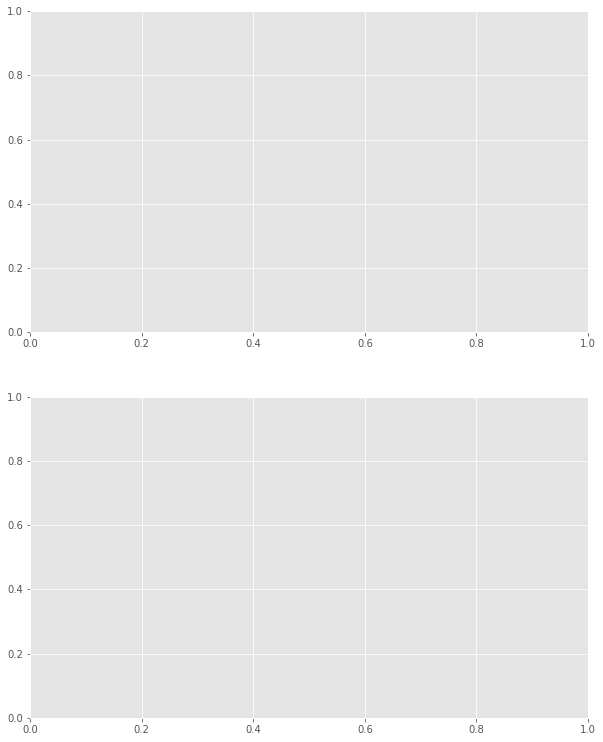

In [62]:
fig, axs = plt.subplots(2,1, figsize=(10,13))

---

# Tuning the Models